In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head(5)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.corr

<bound method DataFrame.corr of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [7]:
df.shape

(13320, 9)

In [8]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df1=df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df1.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df2.shape

(13246, 5)

In [15]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\devma\AppData\Local\Temp\ipykernel_20424\2737495042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df2.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3=df2.drop(['size'],axis='columns')

In [18]:
df3.head(5)


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [19]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(5)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [22]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [23]:
df4.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [24]:
df4.dropna()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [25]:
df4.shape

(13246, 5)

In [26]:
df4['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [27]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [28]:
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                           535
Sarjapur  Road                       392
Electronic City                      304
Kanakpura Road                       266
Thanisandra                          236
                                    ... 
Duddanahalli                           1
Beml layout, Rajarajeshwari nagar      1
Sabari Nagar                           1
Ashraya Layout                         1
Whitefield ECC Road                    1
Name: count, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1052

In [30]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagadevanahalli                      10
Ganga Nagar                          10
Kalkere                              10
BTM 1st Stage                        10
Sector 1 HSR Layout                  10
                                     ..
Duddanahalli                          1
Beml layout, Rajarajeshwari nagar     1
Sabari Nagar                          1
Ashraya Layout                        1
Whitefield ECC Road                   1
Name: count, Length: 1052, dtype: int64

In [31]:
df4.location=df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [32]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12502, 6)

In [33]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6=remove_pps_outliers(df5)
df6.shape

(10241, 6)

In [34]:
def plot_scatter_chart(df,location):
    plt.figure(figsize=(10,6))
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    

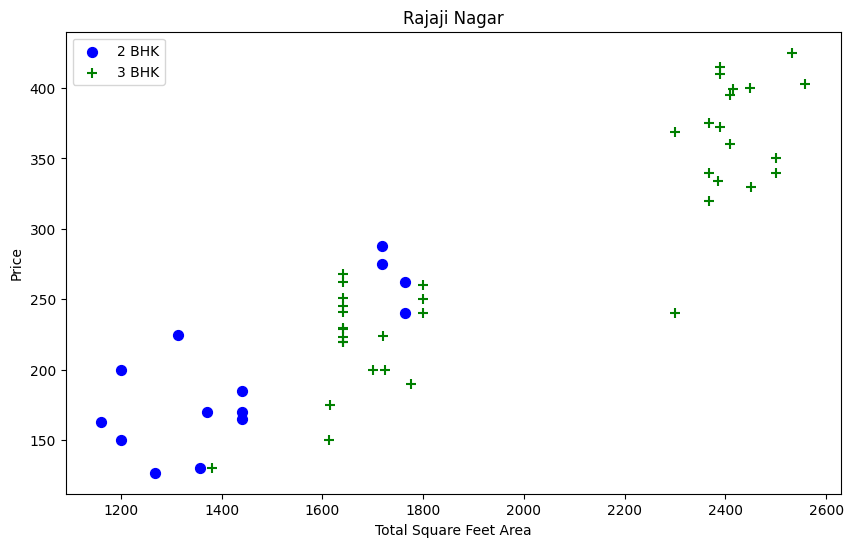

In [35]:
plot_scatter_chart(df6,'Rajaji Nagar')

In [36]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df7=remove_bhk_outliers(df6)
df7.shape

(7329, 6)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

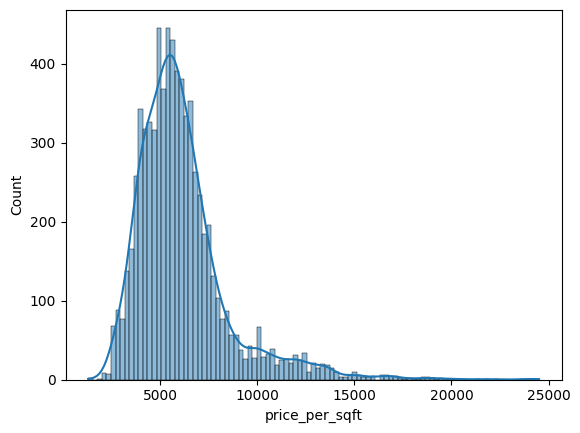

In [37]:
sns.histplot(df7.price_per_sqft,kde=True)

In [38]:
df7[df7.bath>10]


,location,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


<Axes: xlabel='bath', ylabel='Count'>

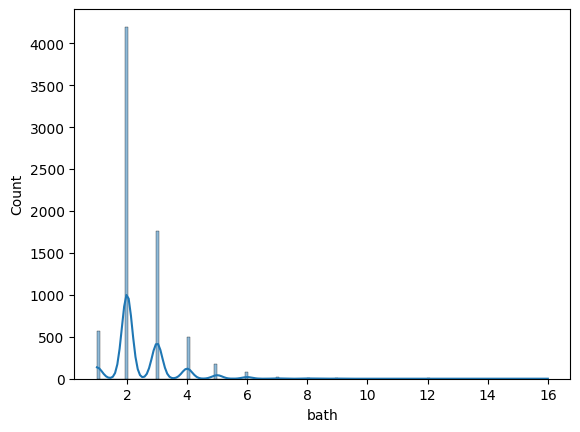

In [39]:
sns.histplot(df7.bath,kde=True)

In [40]:
df7[df7.bath>df7.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [41]:
df8=df7[df7.bath<df7.BHK+2]
df8.shape

(7251, 6)

In [42]:
df9=df8.drop(['price_per_sqft'],axis='columns')
df9.head(5)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [43]:
pd.get_dummies(df9.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [44]:
df10=pd.concat([df9,pd.get_dummies(df9.location).drop('other',axis='columns')],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df11=df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df11.shape

(7251, 245)

In [47]:
X=df11.drop('price',axis='columns')
len(X.columns)

244

In [48]:
y=df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

bg = BaggingRegressor(estimator=LinearRegression(), n_estimators=3, random_state=41, n_jobs=-1)
bg.fit(X_train, y_train)

train_score = bg.score(X_train, y_train)
test_score = bg.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"difference: {train_score - test_score}")

Train Score: 0.836824110425805
Test Score: 0.852033865331754
difference: -0.015209754905949002


In [51]:
def predict_price(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index>=0:
        x[loc_index]=1
    return bg.predict([x])[0]

In [54]:
df11.head(5)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
predict_price('1st Block Jayanagar', 2850, 4, 4)

c:\Users\devma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


np.float64(363.00071861997554)

In [56]:
import pickle
with open('banglore_house_price_model.pickle','wb') as f:
    pickle.dump(bg,f)

In [57]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('banglore_house_price_columns.json', 'w') as f:
    f.write(json.dumps(columns))